In [34]:
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [35]:
def load_train_data(fileName):
    w = np.genfromtxt(fileName, delimiter=',')
    x_train = w[1:,1:-1]
    y_train = w[1:,-1].astype(int)
    return x_train, y_train
    
def load_test_data(fileName):
    w = np.genfromtxt(fileName, delimiter=',')
    x_test = w[1:,1:]
    return x_test

In [36]:
x_train, y_train = load_train_data('train.csv')

In [37]:
import collections
collections.Counter(y_train)

Counter({0: 4971,
         5: 4584,
         4: 4905,
         1: 5450,
         3: 5144,
         6: 4866,
         9: 4916,
         2: 5049,
         8: 4979,
         7: 5136})

In [38]:
x_test = load_test_data('test.csv')

In [39]:
x_train.shape, y_train.shape

((50000, 110), (50000,))

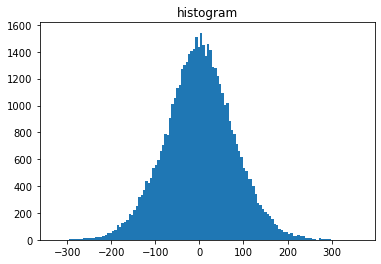

In [8]:
plt.hist(x_train[:,69],bins='auto') 
plt.title("histogram") 
plt.show()

In [ ]:
cor = np.corrcoef(x_train)

In [ ]:
np.where(cor[7]>0.6)

## замена пропусков на mean

In [40]:
col_mean = np.nanmean(x_train, axis=0)
inds = np.where(np.isnan(x_train))

#Place column means in the indices. Align the arrays using take
x_train[inds] = np.take(col_mean, inds[1])


In [41]:
x_train

array([[  -4.18782175,  -13.97884594, -246.34682666, ...,    3.19031071,
         158.66038527,  -83.84856107],
       [  24.0948567 ,  -11.57004215,   26.79325158, ...,   -2.7875209 ,
          40.60194096,  -36.4625736 ],
       [ 129.6267664 ,  153.36104363, -228.57525212, ...,   76.76735155,
        -271.18427253,   63.88935008],
       ...,
       [-159.05880537, -127.40203363, -140.2599599 , ...,  -71.07437772,
        -107.46873332,  111.95589156],
       [ -27.40781799,   44.82630377,    0.53251789, ...,  -25.95404987,
         482.5088313 ,  -74.90914378],
       [  88.86940807,  -53.04860481,  -42.41488281, ...,   42.66332095,
         443.05899756,   52.74068888]])

In [11]:
col_mean = np.nanmean(x_test, axis=0)
inds = np.where(np.isnan(x_test))

#Place column means in the indices. Align the arrays using take
x_test[inds] = np.take(col_mean, inds[1])

In [43]:
x_train

array([[-4.72896195e-02, -1.86321013e-01, -1.79353836e+00, ...,
         5.43519520e-02,  3.88821646e-01, -1.11295092e+00],
       [ 2.66510597e-01, -1.53968041e-01,  1.90779968e-01, ...,
        -4.59929977e-02,  9.96349211e-02, -4.83517956e-01],
       [ 1.43740169e+00,  2.06124385e+00, -1.66443076e+00, ...,
         1.28942931e+00, -6.64092185e-01,  8.49467008e-01],
       ...,
       [-1.76560454e+00, -1.70972331e+00, -1.02283450e+00, ...,
        -1.19226838e+00, -2.63067414e-01,  1.48793984e+00],
       [-3.04918679e-01,  6.03498968e-01,  3.61338435e-16, ...,
        -4.34870493e-01,  1.18209545e+00, -9.94207718e-01],
       [ 9.85193175e-01, -7.11072269e-01, -3.12005895e-01, ...,
         7.16952957e-01,  1.08546223e+00,  7.01378190e-01]])

## Nearest neighbors imputation

In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer(n_neighbors=31, weights="distance")

In [ ]:
#x_train_kNN = imputer.fit_transform(x_train)
#x_test_kNN = imputer.fit_transform(x_test)

## normalize

In [29]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [ ]:
#x_train_nor = (x_train - np.mean(x_train, axis=0))/np.std(x_train, axis=0)

## Разбиение обучающей базы на обучающую и тестовую

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0) 
print('X_train_norm.shape, y_train.shape: ', x_train.shape, y_train.shape)
print('X_train.shape, Y_train.shape, X_test.shape, Y_test.shape: ', X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train_norm.shape, y_train.shape:  (50000, 110) (50000,)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape:  (40000, 110) (40000,) (10000, 110) (10000,)


In [50]:
from sklearn import svm
from sklearn.svm import SVC

In [53]:
mod = SVC(kernel = 'linear')
mod.fit(X_train,Y_train)
r=mod.predict(X_test)
print('Accuracy',np.sum(Y_test == r)/len(Y_test))


Accuracy 0.7157


In [54]:
mod = SVC(kernel = 'poly')
mod.fit(X_train,Y_train)
r=mod.predict(X_test)
print('Accuracy',np.sum(Y_test == r)/len(Y_test))

Accuracy 0.7649


In [56]:
mod = SVC(kernel = 'rbf')
mod.fit(X_train,Y_train)
r=mod.predict(X_test)
print('Accuracy',np.sum(Y_test == r)/len(Y_test))

Accuracy 0.7748


## KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
def fun(dist):
    ret = np.ones_like(dist)
    k = ret.shape[1]
    for i in range(k):
        ret[:,i] *=(k-i)/k
    return ret
    

In [14]:
model_kNN = KNeighborsClassifier(n_neighbors=15, weights=fun)

## GaussianNB

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb = GaussianNB()

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression


In [18]:
LogReg = LogisticRegression(random_state=42, solver='saga',multi_class='multinomial')


## Kmeans

In [19]:
from sklearn.cluster import KMeans

In [20]:
def clusters(x_train, y_train):
    yy = np.array([],dtype=np.int64)
    for i in range(10):
        
        count = 500#int(np.unique(y_train, return_counts=True)[1][i]//1.5)
        #print(count)
        ind_i = np.where(y_train == i)[0]
        kmeans = KMeans(n_clusters=count, random_state=0).fit(x_train[ind_i])
        if i == 0:
            list_clusters = kmeans.cluster_centers_
        else:
            list_clusters = np.vstack((list_clusters, kmeans.cluster_centers_))
        yy =  np.append(yy, np.array([i]*count))
        int_array = yy.astype(int)
    return list_clusters, int_array
    

## Отступ для разделяющего классификатора+выбор эталонов из test

In [21]:

def marg(prob,Y_test,X_test):
    M = np.array([(j[k] - np.max(np.append(j[:k],j[k+1:])))  for j,k in zip(prob,Y_test)])
    ind = np.where(M>0.75)
    etalon_x  = np.copy(X_test[ind])
    etalon_y  = np.copy(Y_test[ind])
    M = np.array(sorted(M))
    c = list(range(len(M)))
    plt.plot(c,M, )
    plt.hlines(0,0,len(c),color='black')
    plt.fill_between(c, M,where = M<0,color='red',alpha=0.5)
    plt.fill_between(c, M,where = M>0,color='green',alpha=0.5)
    return [etalon_x,etalon_y]

## KFold

In [32]:
from sklearn.model_selection import KFold

In [57]:
kf = KFold(n_splits=3)
kf.get_n_splits(X_train)

3

## LogisticRegression.Сталкиваем классы между собой.

In [2]:
k = 0
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kNN, X_test_kNN = X_train[train_index], X_train[test_index]
    Y_train_kNN, Y_test_kNN = Y_train[train_index], Y_train[test_index]
    models = []
    for i in range(0,10):
        model = LogReg = LogisticRegression(penalty = 'l1',random_state=0,max_iter=2000, solver = 'saga')
        yy = np.array(Y_train_kNN==i,dtype = np.int64)
        model.fit(X_train_kNN,yy)
        models.append(model)
    y_preds = []
    for i in range(0,10):
            y_pred = models[i].predict(X_test_kNN)
            y_preds.append(y_pred)
    rr = []
    for i in range(np.array(y_preds).shape[1]):
        if len(np.where(np.array(y_preds)[:,i] == 1)[0]) == 0:
            rr.append(1)
        else :
            rr.append(np.where(np.array(y_preds)[:,i] == 1)[0][0])
    print('Accuracy',np.sum(Y_test_kNN == np.array(rr))/len(Y_test_kNN))
    

NameError: name 'kf' is not defined

In [27]:
y_preds

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64)]

## KNN.LogisticRegression.GaussianNB

In [59]:
k = 0
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kNN, X_test_kNN = X_train[train_index], X_train[test_index]
    Y_train_kNN, Y_test_kNN = Y_train[train_index], Y_train[test_index]
    
    mod = SVC(kernel = 'poly')
    mod.fit(X_train_kNN,Y_train_kNN)
    r=mod.predict(X_test_kNN)
    print('Accuracy',np.sum(Y_test_kNN == r)/len(Y_test_kNN))
    
#Кластеризация
    #x_test_kmeans, y_test_kmeans = clusters(X_train_kNN,Y_train_kNN)

    #LogReg.fit(x_test_kmeans,y_test_kmeans)
    #y_predLogReg_means = LogReg.predict(X_test_kNN)
    #print('LogReg_kmeans',np.sum(Y_test_kNN == y_predLogReg_means)/len(Y_test_kNN))
    #marg(LogReg.predict_proba(X_test_kNN),Y_test_kNN)

    #model_kNN.fit(x_test_kmeans,y_test_kmeans)
    #y_predmodel_kNN_means = model_kNN.predict(X_test_kNN)
    #print('model_kNN_kmeans',np.sum(Y_test_kNN == y_predmodel_kNN_means)/len(Y_test_kNN))
    #marg(model_kNN.predict_proba(X_test_kNN),Y_test_kNN,'model_kNN')

    #SGD.fit(x_test_kmeans,y_test_kmeans)
    #y_predSGD = SGD.predict(X_test_kNN)
    #print('SGD',np.sum(Y_test_kNN == y_predSGD)/len(Y_test_kNN))
    #marg(SGD.predict_proba(X_test_kNN),Y_test_kNN)

# Выбор эталонов для knn

    #model_kNN =  KNeighborsClassifier(n_neighbors=35, weights='distance')
    #model_kNN.fit(X_train_kNN,Y_train_kNN)
    #y_predmodel_kNN = model_kNN.predict(X_test_kNN)
    #print('model_kNN',np.sum(Y_test_kNN == y_predmodel_kNN)/len(Y_test_kNN))
    #if k == 0:
    #    etalon_x, etalon_y = marg(model_kNN.predict_proba(X_test_kNN),Y_test_kNN,X_test_kNN)
    #else:
    #    a,b = marg(model_kNN.predict_proba(X_test_kNN),Y_test_kNN,X_test_kNN)
    #    np.vstack((etalon_x,a))
    #    np.concatenate([etalon_y,b])
    #k+=1
    
#Обычный LogReg,GaussianNB
    #LogReg.fit(X_train_kNN,Y_train_kNN)
    #y_predLogReg = LogReg.predict(X_test_kNN)
    #print('LogReg',np.sum(Y_test_kNN == y_predLogReg)/len(Y_test_kNN))
    #marg(LogReg.predict_proba(X_test_kNN),Y_test_kNN)

    #nb.fit(X_train_kNN,Y_train_kNN)
    #y_prednb = nb.predict(X_test_kNN)
    #print('nb',np.sum(Y_test_kNN == y_prednb)/len(Y_test_kNN))
     #marg(model_kNN.predict_proba(X_test_kNN),Y_test_kNN)



TRAIN: [13334 13335 13336 ... 39997 39998 39999] TEST: [    0     1     2 ... 13331 13332 13333]
Accuracy 0.7540122993850308
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [13334 13335 13336 ... 26664 26665 26666]
Accuracy 0.7559438985974649
TRAIN: [    0     1     2 ... 26664 26665 26666] TEST: [26667 26668 26669 ... 39997 39998 39999]
Accuracy 0.7582689567239181


## Подбор параметра для KNN

In [ ]:
x = []
y = []
mean = 0
for k in range(5,125,10):
    model_kNN =  KNeighborsClassifier(n_neighbors=k, weights='distance')
    print(k)
    x.append(k)
    mean = 0
    for train_index, test_index in kf.split(X_train):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train_kNN, X_test_kNN = X_train[train_index], X_train[test_index]
        Y_train_kNN, Y_test_kNN = Y_train[train_index], Y_train[test_index]
        #print('Y_test_kNN',collections.Counter(Y_test_kNN))
        #x_test_kmeans, y_test_kmeans = clusters(X_train_kNN,Y_train_kNN)

        
        model_kNN.fit(X_train_kNN,Y_train_kNN)
        y_predmodel_kNN = model_kNN.predict(X_test_kNN)
        print('model_kNN',np.sum(Y_test_kNN != y_predmodel_kNN)/len(Y_test_kNN))
        mean+=np.sum(Y_test_kNN != y_predmodel_kNN)/len(Y_test_kNN)
        print('mean_i',mean)
       
    y.append(mean/2)
    print(y)



In [ ]:
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=6)

## Обучение финальной модели.Я выбрал KNN.

In [46]:
model_kNN = KNeighborsClassifier(n_neighbors=15, weights=fun)

In [30]:
model_kNN.fit(x_train, y_train)
res = model_kNN.predict(x_test)
#print(np.sum(Y_test == y_pred)/len(Y_test))

## sample_sabmission

In [31]:
col = np.array(range(0,10000))

In [32]:
result = np.c_[col,res]
print(result)

[[   0    4]
 [   1    7]
 [   2    3]
 ...
 [9997    1]
 [9998    3]
 [9999    2]]


In [33]:
with open("sample_sabmission.csv", "wb") as f:
    f.write(b'id,label\n')
    np.savetxt(f, result.astype(int), fmt='%i', delimiter=",")